In [4]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

# Visualization style
sns.set()

In [5]:
#csv file load
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.shape              # How many column and rows number show?

(891, 12)

In [7]:
train.info()   # rows and columns show and missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
train.isnull().sum()        # Age 177 missing values , Cabin687 missing values , Embarked 2 missing values   missing valus show

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **Data Cleaning**


In [9]:
# Filling missing Age values with the median Age

train['Age'].fillna(train['Age'].median(),inplace=True)

C:\Users\dapuc\AppData\Local\Temp\ipykernel_132\2553047892.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(),inplace=True)


In [10]:
# Filling missing Embarked values with the most frequent value (mode)

train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)

C:\Users\dapuc\AppData\Local\Temp\ipykernel_132\463750828.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Embarked'].fillna(train['Embarked'].mode()[0],inplace=True)


In [11]:
# Removing the Cabin column because it contains too many missing values

train.drop('Cabin',axis=1,inplace=True)

In [12]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [13]:
train.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## **Data Preprocessing**


In [14]:
from sklearn.preprocessing import LabelEncoder

#Initialize Encoder
le=LabelEncoder()

# Encode Sex Column
train['Sex']=le.fit_transform(train['Sex'])

# Converting 'Sex' column from text to numbers so ML model can understand it.

In [15]:
train['Embarked']=le.fit_transform(train['Embarked'])

# Encoding 'Embarked' column (C, Q, S) to numeric values.

In [16]:
# X = Input features for training the model
# y = Output label that model will predict

X = train[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y = train['Survived']

In [17]:
# Splitting data into training and testing sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
# Training Logistic Regression model on training data.

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [19]:
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test , y_pred)

accuracy

0.8100558659217877

## **Feature Scaling**

In [20]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Safe way to scale columns (no warning) # Apply scaling to selected numeric features
X.loc[:, ['Age', 'Fare']] = scaler.fit_transform(X[['Age', 'Fare']])


## **Model Evaluation**

✔ Confusion Matrix
✔ Classification Report
✔ Precision
✔ Recall
✔ F1-score

In [21]:
from sklearn.metrics import confusion_matrix,classification_report

# Predictions
y_pred=model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cm)

#Classification Report
cr=classification_report(y_test,y_pred)
print("Classification Report:\n",cr)

Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## **Model Improvement**

Random Forest (Best model for Tabular Data)

XGBoost / Gradient Boosting

Decision Tree

SVM

In [22]:
from sklearn.ensemble import RandomForestClassifier

rf  = RandomForestClassifier(n_estimators=200,random_state=42)
rf.fit(X_train,y_train)

y_pred_rf = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test,y_pred_rf)
accuracy_rf

0.8100558659217877

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

print("RF Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nRF Classification Report:\n", classification_report(y_test, y_pred_rf))


RF Confusion Matrix:
 [[89 16]
 [18 56]]

RF Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## **Compare All Models**

✔ Logistic Regression
✔ Random Forest
✔ Decision Tree
✔ SVM

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

models = {
    "Logistic Regrassion":LogisticRegression(max_iter=200),
    "Random Forest":RandomForestClassifier(n_estimators=200,random_state=42),
    "Desion Tree":DecisionTreeClassifier(random_state=42),
    "SVC":SVC()
}

results={}

for name,model in models.items():

    # Train model
    model.fit(X_train,y_train)
    
    # Predict
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc=accuracy_score(y_test,y_pred)
    results[name] = acc

    print("\n=================================")
    print(f"Model:{name}")
    print("Accuracy",acc)
    print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
    print("Classification Report:\n",classification_report(y_test,y_pred))
    


Model:Logistic Regrassion
Accuracy 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Model:Random Forest
Accuracy 0.8100558659217877
Confusion Matrix:
 [[89 16]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       105
           1       0.78      0.76      0.77        74

    accuracy                           0.81       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179


Model:Desion Tree
Accuracy 0.7821229050279329
Confusion Matrix:
 [[83 22]
 [17 57]]
Classification Report:
          

## **Visualization**

1️⃣ Confusion Matrix Heatmap
2️⃣ Model Comparison Bar Chart
3️⃣ Feature Importance (Random Forest)

### 1. Confusion Matrix Heatmap

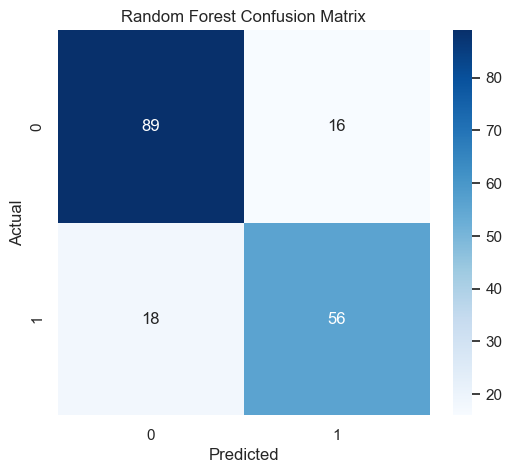

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


### Model Comparison Bar Chart

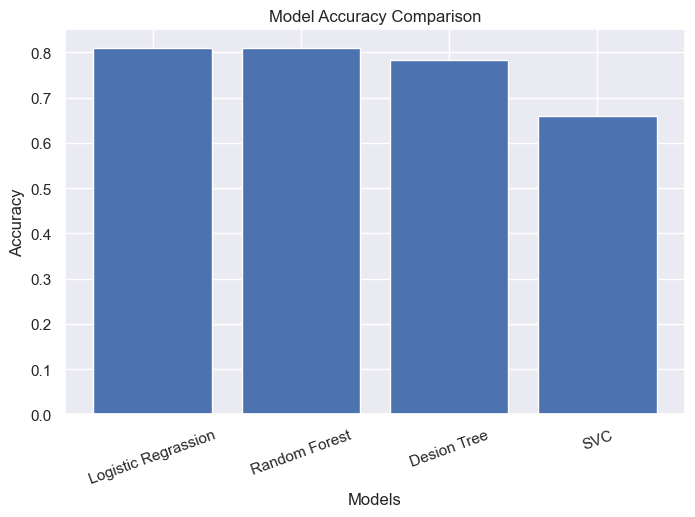

In [26]:
plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values())
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=20)
plt.show()


### Feature Importance

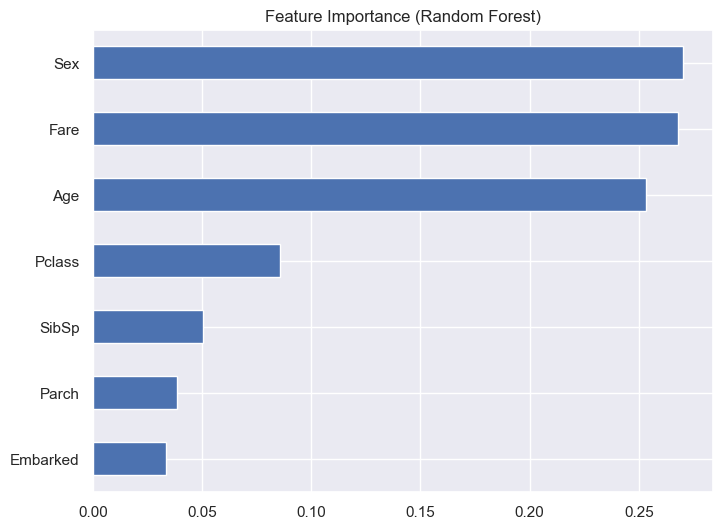

In [27]:
import pandas as pd
import numpy as np

feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance (Random Forest)")
plt.show()


In [28]:
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators': [100,200,300],
    'max_depth':[3,5,7,10],
    'min_samples_split':[2,5,10],
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}


## **Best Model Select & Save Model**

In [29]:
import pickle

# Save the best model (use the one with highest accuracy)
best_model = rf   # example: Random Forest

pickle.dump(best_model, open("titanic_model.pkl", "wb"))


In [53]:
model = pickle.load(open("titanic_model.pkl", "rb"))


## **Make a Function: Predict Survival for New Person**

✔ Age
✔ Gender
✔ Pclass
✔ Fare
✔ Embarked

In [30]:
def predict_survival(Pclass, Sex, Age, SibSp, Parch, Fare, Embarked) : 
    data = [[Pclass, Sex, Age, SibSp, Parch, Fare, Embarked]]
    prediction = best_model.predict(data)
    if prediction == 1:
        return "Survived"
    else:
        return "Not Survived"
